In [1]:
# import basic librariees and autograd wrapped numpy
import sys
sys.path.append('../')
import autograd.numpy as np
import matplotlib.pyplot as plt

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

# Exercise 4.1. Determining the eigenvalues of a symmetric matrix

See pictures

# Exercise 4.5. Newton's method II

See pictures for (a) and (b)

In [2]:
# using an automatic differentiator - like the one imported via the statement below - makes coding up gradient descent a breeze
from autograd import grad 
from autograd import hessian

# newtons method function - inputs: g (input function), max_its (maximum number of iterations), w (initialization)
def newtons_method(g,max_its,w,**kwargs):
    # compute gradient module using autograd
    gradient = grad(g)
    hess = hessian(g)
    
    # set numericxal stability parameter / regularization parameter
    epsilon = 10**(-10)
    if 'epsilon' in kwargs:
        epsilon = kwargs['epsilon']

    # run the newtons method loop
    weight_history = [w]           # container for weight history
    cost_history = [g(w)]          # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient and hessian
        grad_eval = gradient(w)
        hess_eval = hess(w)

        # reshape hessian to square matrix for numpy linalg functionality
        hess_eval.shape = (int((np.size(hess_eval))**(0.5)),int((np.size(hess_eval))**(0.5)))

        # solve second order system system for weight update
        A = hess_eval + epsilon*np.eye(w.size)
        b = grad_eval
        w = np.linalg.solve(A,np.dot(A,w) - b)
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

Text(0, 0.5, 'function evaluation')

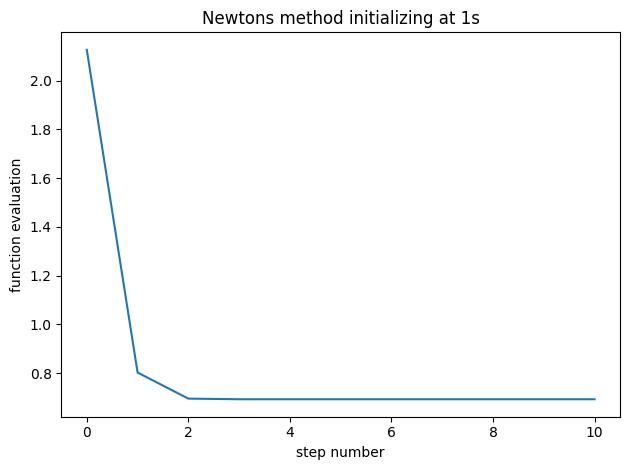

In [3]:
#(c)
g = lambda w: np.log(1+np.exp(np.dot(w.T,w)))
w = np.ones(2,)
max_its = 10
weight_history,cost_history_1 = newtons_method(g,max_its,w)
plt.title('Newtons method initializing at 1s')
plt.plot(range(0,max_its+1),cost_history_1)
plt.xlabel('step number')
plt.ylabel('function evaluation')

[2.1269280110429727, 0.8028127806155011, 0.6957337248004978, 0.6931472484532555, 0.6931471805599453, 0.6931471805599453, 0.6931471805599453, 0.6931471805599453, 0.6931471805599453, 0.6931471805599453, 0.6931471805599453]
[32.000000000000014, 0.6931471805599453, 0.6931471805599453, 0.6931471805599453, 0.6931471805599453, 0.6931471805599453, 0.6931471805599453, 0.6931471805599453, 0.6931471805599453, 0.6931471805599453, 0.6931471805599453]


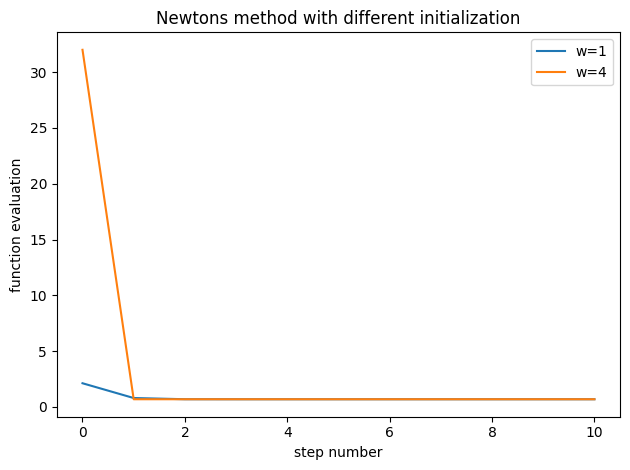

In [4]:
#(d) Initialzation with w = 4 converges faster (in 2 steps) than with w = 1(in 4 steps).
# This makes sense because the fucntion g(w) is convex, the quadratic approximations at w at larger values (farther from 0) give steeper decent slopes,
# where as at w = 1, the initialization is too close to the minimum and the decent slope is smaller (quadratic approximation is flatter) and thus
# required more steps to converge because each step takes a smaller descending direction.
w = 4*np.ones(2,)
max_its = 10
weight_history,cost_history_4 = newtons_method(g,max_its,w)
plt.title('Newtons method with different initialization')
plt.plot(range(0,max_its+1),cost_history_1, label = 'w=1')
plt.plot(range(0,max_its+1),cost_history_4, label = 'w=4')
plt.xlabel('step number')
plt.ylabel('function evaluation')
plt.legend()

print(cost_history_1)
print(cost_history_4)

# Exercise 5.2. Kleiber’s law and linear regression

In [5]:
datapath = '/Users/sherryan/Downloads/'

In [6]:
# import the dataset
csvname = datapath + 'kleibers_law_data.csv'
data = np.loadtxt(csvname,delimiter=',')
x = data[:-1,:]
y = data[-1:,:]

print(np.shape(x))
print(np.shape(y))

x = np.log(x)
y = np.log(y)

def model(x,w):
    a = w[0] + np.dot(x.T, w[1:])
    return a.T

def least_squares(w):
    cost = np.sum((model(x,w) - y)**2)
    return cost/float(np.size(y))

def gradient_descent(g, alpha, max_its, w):
    gradient = grad(g)
    
    weight_history = [w]
    cost_history = [g(w)]
    for k in range(max_its):
        grad_eval = gradient(w)
        w = w - alpha*grad_eval
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history, cost_history
    

(1, 1498)
(1, 1498)


In [7]:
max_its = 1000
w = np.random.rand(2,1)
weight_history, cost_history = gradient_descent(least_squares, 0.01, max_its, w)

[[6.81472479]
 [0.65281017]]


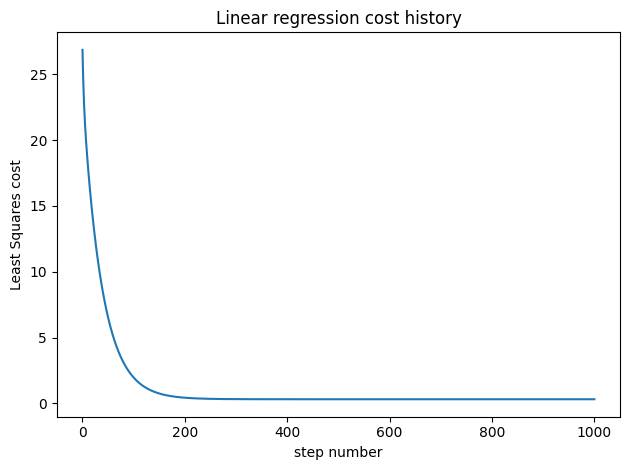

In [8]:
plt.title('Linear regression cost history')
plt.plot(range(0,max_its+1),cost_history)
plt.xlabel('step number')
plt.ylabel('Least Squares cost')
# print(cost_history)
print(weight_history[-1])

In [9]:
#(b)
print('metabolic rate = e^(', str(weight_history[-1][0,0]), '+ log(body mass)*', str(weight_history[-1][1,0]),')')

metabolic rate = e^( 6.814724793940475 + log(body mass)* 0.6528101681007293 )


In [10]:
#(c)
body_mass = 10
calorie = np.exp(weight_history[-1][1,0]* np.log(body_mass) + weight_history[-1][0,0])*1000/4.18
print('the animal needs',str(calorie),'calories per day')

the animal needs 980011.6986854381 calories per day


# Exercise 5.9. Housing price and Automobile Miles-per-Gallon prediction

In [11]:
# import the dataset
csvname =  datapath + 'boston_housing.csv'
data = np.loadtxt(csvname,delimiter=',')
x = data[:-1,:]
y = data[-1:,:]

print(np.shape(x))
print(np.shape(y))

(13, 506)
(1, 506)


In [12]:
x =  (x - np.nanmean(x,axis=1)[:,np.newaxis])/np.nanstd(x,axis=1)[:,np.newaxis] #standard normalize
x = x[:,~np.isnan(x).any(axis=0)] #ignore NaNs

def model(x,w):
    a = w[0] + np.dot(x.T, w[1:])
    return a.T

def least_squares(w):
    cost = np.sum((model(x,w) - y)**2)
    return cost/float(np.size(y))

def least_abs_dev(w):
    cost = np.sum(np.abs((model(x,w)-y)))
    return cost/float(np.size(y))

def gradient_descent(g, alpha, max_its, w):
    gradient = grad(g)
    weight_history = [w]
    cost_history = [g(w)]
    for k in range(max_its):
        grad_eval = gradient(w)
        w = w - alpha*grad_eval
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history, cost_history
    

RMSE 4.679506300636042
MAD 3.08904724803253


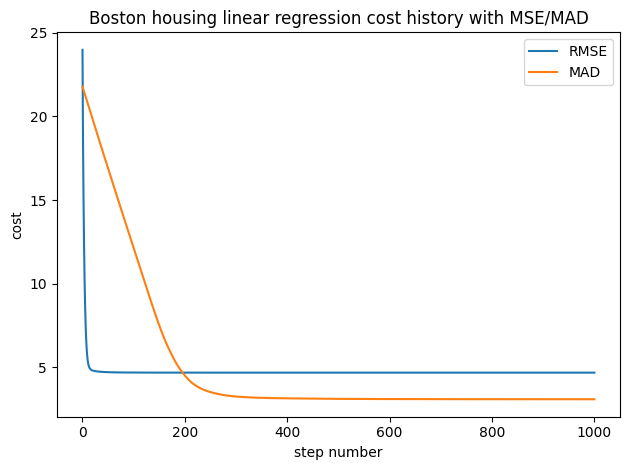

In [13]:
max_its = 1000
w = np.random.rand(x.shape[0]+1,1)
weight_history_1,cost_history_1 = gradient_descent(least_squares, 0.1, max_its, w)
cost_history_1 = np.sqrt(cost_history_1)
weight_history_2,cost_history_2 = gradient_descent(least_abs_dev, 0.1, max_its, w)

plt.title('Boston housing linear regression cost history with MSE/MAD')
plt.plot(range(0,max_its+1),cost_history_1,label = 'RMSE')
plt.plot(range(0,max_its+1),cost_history_2,label = 'MAD')
plt.xlabel('step number')
plt.ylabel('cost')
plt.legend()

print('RMSE',cost_history_1[-1])
print('MAD',cost_history_2[-1])

In [14]:
# import the dataset
csvname =  datapath + 'auto_data.csv'
data = np.loadtxt(csvname,delimiter=',')
x = data[:-1,:]
y = data[-1:,:]

print(np.shape(x))
print(np.shape(y))

(7, 398)
(1, 398)


In [15]:
x = (x - np.nanmean(x,axis=1)[:,np.newaxis])/np.nanstd(x,axis=1)[:,np.newaxis]
y = y[:,~np.isnan(x).any(axis=0)]
x = x[:,~np.isnan(x).any(axis=0)]

def model(x,w):
    a = w[0] + np.dot(x.T, w[1:])
    return a.T

def least_squares(w):
    cost = np.sum((model(x,w) - y)**2)
    return cost/float(np.size(y))

def least_abs_dev(w):
    cost = np.sum(np.abs((model(x,w)-y)))
    return cost/float(np.size(y))

def gradient_descent(g, alpha, max_its, w):
    gradient = grad(g)
    weight_history = [w]
    cost_history = [g(w)]
    for k in range(max_its):
        grad_eval = gradient(w)
        w = w - alpha*grad_eval
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history, cost_history


RMSE 3.2935514881435477
MAD 2.4466060900733484


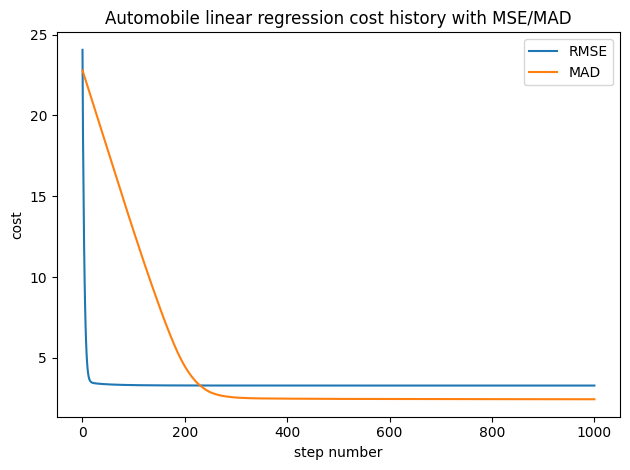

In [16]:
max_its = 1000
w = np.random.rand(x.shape[0]+1,1)
weight_history_1,cost_history_1 = gradient_descent(least_squares, 0.1, max_its, w)
cost_history_1 = np.sqrt(cost_history_1)
weight_history_2,cost_history_2 = gradient_descent(least_abs_dev, 0.1, max_its, w)

plt.title('Automobile linear regression cost history with MSE/MAD')
plt.plot(range(0,max_its+1),cost_history_1,label = 'RMSE')
plt.plot(range(0,max_its+1),cost_history_2,label = 'MAD')
plt.xlabel('step number')
plt.ylabel('cost')
plt.legend()

print('RMSE',cost_history_1[-1])
print('MAD',cost_history_2[-1])